<a href="https://colab.research.google.com/github/issacridhin/S5_Predictive-Analysis/blob/main/2348546_Lab1_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries and reading the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/Online Retail.xlsx')

#1Q. Data Cleaning and Preparation

In [ ]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


We are handling the missing values

In [ ]:
df.dropna(subset=['CustomerID', 'Description'], inplace=True)

We are dropping the duplicates

In [ ]:
df.drop_duplicates(inplace=True)

Removing the irrelevant data

In [ ]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

Descriptive statistics

In [ ]:
print(df[['Quantity', 'UnitPrice']].describe())

            Quantity      UnitPrice
count  392692.000000  392692.000000
mean       13.119702       3.125914
std       180.492832      22.241836
min         1.000000       0.001000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000


**Interpretation**

1. We had missing values for the CustomerID (135080) and Description (1454) columns, we had handled them using the dropna function.

2. We had also removed the duplicates present using the drop_duplicates function.

3. We then removed the irrelevant data by choosing only the data that had Quantity and Unit Price greater than 0.

4. Then we performed a descriptive analysis of the Quantity and the Unit Price.

#2Q. Sales Analysis

2.1Q What are the top 10 best-selling products by quantity?

In [ ]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


2.2Q What is the total revenue generated by each product?

In [ ]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
total_revenue = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False)
print(total_revenue)

Description
PAPER CRAFT , LITTLE BIRDIE           168469.600
REGENCY CAKESTAND 3 TIER              142264.750
WHITE HANGING HEART T-LIGHT HOLDER    100392.100
JUMBO BAG RED RETROSPOT                85040.540
MEDIUM CERAMIC TOP STORAGE JAR         81416.730
                                         ...    
PURPLE FRANGIPANI HAIRCLIP                 0.850
VINTAGE BLUE TINSEL REEL                   0.840
SET 12 COLOURING PENCILS DOILEY            0.650
HEN HOUSE W CHICK IN NEST                  0.420
PADS TO MATCH ALL CUSHIONS                 0.003
Name: TotalSales, Length: 3877, dtype: float64


2.3Q What is the monthly revenue trend? Are there noticeable patterns or peaks in sales over time?

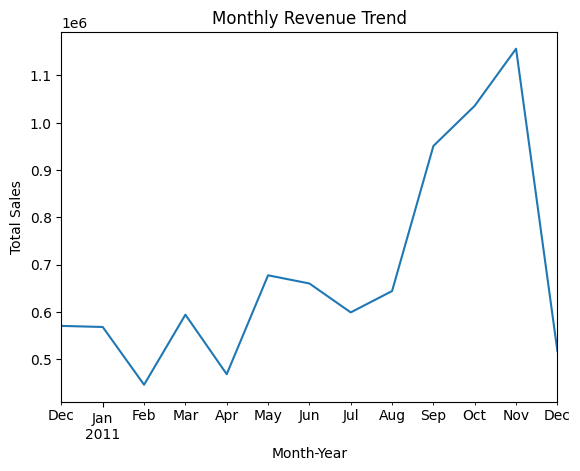

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')
monthly_trend = df.groupby('MonthYear')['TotalSales'].sum()
monthly_trend.plot(kind='line')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.show()

**Interpretation**
1. "PAPER CRAFT, LITTLE BIRDIE"and "MEDIUM CERAMIC TOP STORAGE JAR" performed the best in both quantity sold and revenue generated.
2. "REGENCY CAKESTAND 3 TIER" and "PAPER CRAFT , LITTLE BIRDIE" are the items that has the most revenue.
3. In the month November, had the most total sales. Then the sales reduced drastically.


#3Q. Customer Behaviour

3.1Q How many unique customers are there in the dataset? What percentage of sales is driven by repeat customers?

In [ ]:
unique_customers = df['CustomerID'].nunique()
print(f"Number of unique customers: {unique_customers}")

Number of unique customers: 4338


In [ ]:
repeat_customers = df[df.duplicated(subset=['CustomerID'], keep=False)]['CustomerID'].nunique()
repeat_percentage = (repeat_customers / unique_customers) * 100
print(f"Percentage of sales by repeat customers: {repeat_percentage:.2f}%")

Percentage of sales by repeat customers: 98.36%


3.2Q What is the average order value (total sales per invoice)? How does this vary across different customer segments (e.g., country-wise)?

In [ ]:
# Calculate total sales per invoice
invoice_total_sales = df.groupby('InvoiceNo')['TotalSales'].sum().reset_index()

# Calculate average order value (AOV) for all invoices
average_order_value = invoice_total_sales['TotalSales'].mean()
print(f"Overall Average Order Value: {average_order_value:.2f}")

Overall Average Order Value: 479.56


In [ ]:
# Average Order Value (AOV) across different customer segments (country-wise)
country_invoice_total = df.groupby(['Country', 'InvoiceNo'])['TotalSales'].sum().reset_index()

# Calculate the average order value for each country
country_aov = country_invoice_total.groupby('Country')['TotalSales'].mean().sort_values(ascending=False).reset_index()
country_aov.columns = ['Country', 'AverageOrderValue']
print(country_aov)

                 Country  AverageOrderValue
0              Singapore        3039.898571
1            Netherlands        3036.663191
2              Australia        2429.014211
3                  Japan        1969.282632
4                Lebanon        1693.880000
5                 Israel        1443.168000
6                 Brazil        1143.600000
7            Switzerland        1106.744118
8                 Sweden        1065.773056
9                Denmark        1053.074444
10                  EIRE        1020.240231
11                Norway        1004.595556
12                   RSA        1002.310000
13                Greece         952.104000
14                Cyprus         843.928125
15       Channel Islands         786.174615
16                   USA         716.078000
17                 Spain         683.984000
18  United Arab Emirates         634.093333
19               Iceland         615.714286
20                Canada         611.063333
21               Austria        

3.3Q Which countries contribute the most to sales revenue?

In [ ]:
# Calculating the total sales revenue by country
country_revenue = df.groupby('Country')['TotalSales'].sum().reset_index()

# Sorting the countries by total sales revenue in descending order
country_revenue = country_revenue.sort_values(by='TotalSales', ascending=False)
print(country_revenue)

                 Country   TotalSales
35        United Kingdom  7285024.644
23           Netherlands   285446.340
10                  EIRE   265262.460
14               Germany   228678.400
13                France   208934.310
0              Australia   138453.810
30                 Spain    61558.560
32           Switzerland    56443.950
3                Belgium    41196.340
31                Sweden    38367.830
19                 Japan    37416.370
24                Norway    36165.440
26              Portugal    33375.840
12               Finland    22546.080
29             Singapore    21279.290
6        Channel Islands    20440.540
9                Denmark    18955.340
18                 Italy    17483.240
7                 Cyprus    13502.850
1                Austria    10198.680
25                Poland     7334.650
17                Israel     7215.840
15                Greece     4760.520
16               Iceland     4310.000
5                 Canada     3666.380
33          

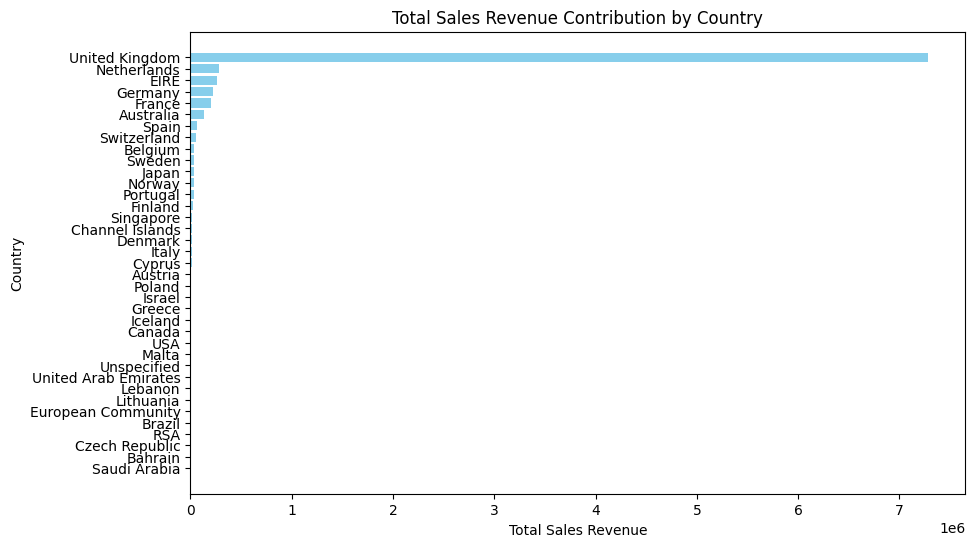

In [ ]:
# Visualization of the countries that contribute the most to sales revenue
plt.figure(figsize=(10, 6))
plt.barh(country_revenue['Country'], country_revenue['TotalSales'], color='skyblue')
plt.xlabel('Total Sales Revenue')
plt.ylabel('Country')
plt.title('Total Sales Revenue Contribution by Country')
plt.gca().invert_yaxis()
plt.show()

**Interpretation**
1. First we have calculated the number of unique customers. We got 4338 unique customers.
2. The Percentage of sales by repeat customers was 98.36%
3. We calculated the overall average order value of 479.56, by calculating the total sales per invoice
4. We calculated the average order value for each country, we can see that Singapore had the most value of 3039.898571, followed by Netherlands of 3036.663191 and Australia of 2429.014211.                                   
5. We calculated the revenue by each country and we found that United Kingdom had the most revenue of 7285024.644, followed by Netherlands of 285446.340 and EIRE of 265262.460.
6. Saudi Arabia had the least revenue and the least average order value of 145.920.



#4Q. Product Performance

4.1Q What are the top 5 countries with the highest average revenue per transaction?

In [ ]:
country_revenue = df.groupby(['Country', 'InvoiceNo'])['TotalSales'].sum().groupby(level=0).mean().sort_values(ascending=False).head(5)
print(country_revenue)

Country
Singapore      3039.898571
Netherlands    3036.663191
Australia      2429.014211
Japan          1969.282632
Lebanon        1693.880000
Name: TotalSales, dtype: float64


4.2Q Investigate if there are any specific months or seasons when certain products perform particularly well.

In [ ]:
# Adding a  Month column
df['Month'] = df['InvoiceDate'].dt.month_name()

# Group by Month and Description to calculate total sales
seasonal_performance = df.groupby(['Month', 'Description'])['TotalSales'].sum().reset_index()

# Find top 5 products with the highest sales in each month
top_products_each_month = seasonal_performance.sort_values('TotalSales', ascending=False).groupby('Month').head(5)

# Displaying the results
print("The top products with High Sales in Specific Months:")
print(top_products_each_month)

The top products with High Sales in Specific Months:
           Month                          Description  TotalSales
6479    December          PAPER CRAFT , LITTLE BIRDIE   168469.60
10975    January       MEDIUM CERAMIC TOP STORAGE JAR    77183.60
15824       June       PICNIC BASKET WICKER 60 PIECES    39619.50
23011   November                   RABBIT NIGHT LIGHT    23190.41
6834    December             REGENCY CAKESTAND 3 TIER    22113.78
25375    October                               Manual    21183.63
22803   November      PAPER CHAIN KIT 50'S CHRISTMAS     16109.51
11897    January   WHITE HANGING HEART T-LIGHT HOLDER    14962.05
18354      March             REGENCY CAKESTAND 3 TIER    14784.65
23806   November   WHITE HANGING HEART T-LIGHT HOLDER    13849.93
20338        May                        PARTY BUNTING    13408.25
20484        May                              POSTAGE    13358.75
1606       April             REGENCY CAKESTAND 3 TIER    12721.50
13662       July       

Visualizing the Top 5 Products with the Highest sales per month

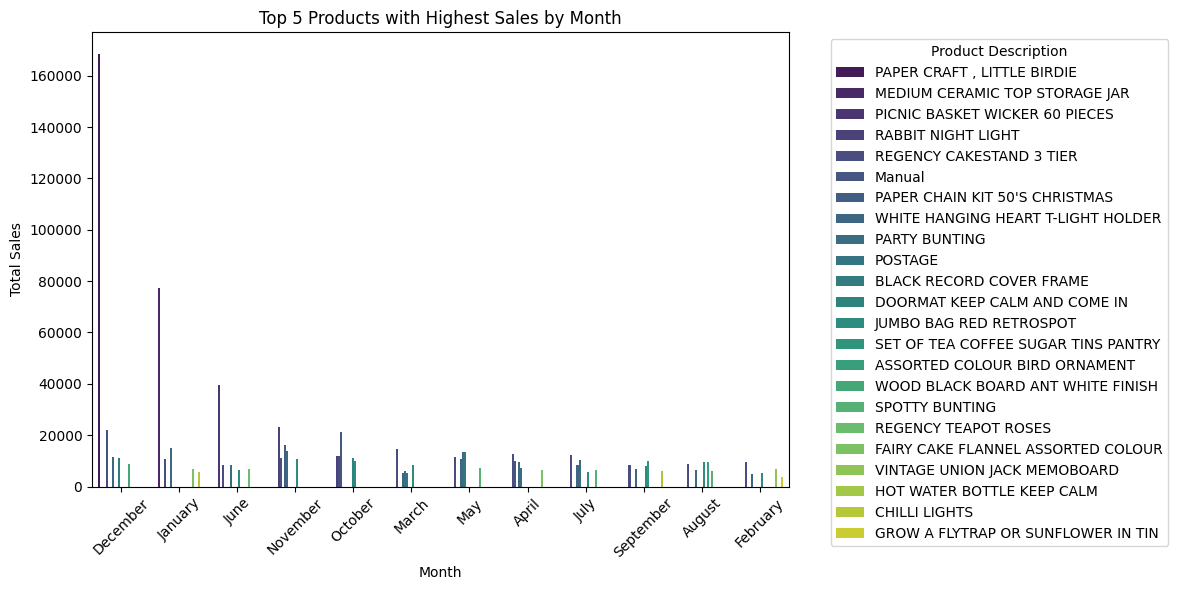

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
# Plotting the grouped bar chart for top 5 products by month
sns.barplot(data=top_products_each_month, x='Month', y='TotalSales', hue='Description', palette='viridis')

#Customizing the plot
plt.title('Top 5 Products with Highest Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Product Description')

plt.tight_layout()
plt.show()

**Interpretaion**
1. The top 5 country with the highest avereage revenue per transaction are:
Singapore, Netherlands, Australia, Japan and Lebanon.    
2. We checked the top products with High Sales in Specific Months and got to know that December had the highest sale for the product " PAPER CRAFT , LITTLE BIRDIE".